**DOMAIN:** Electronics and Telecommunication

**Problem Statement**

A communications equipment manufacturing company has a product which is responsible for emitting informative signals.

Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

**PROJECT OBJECTIVE:** To build a classifier which can use the given parameters to determine the signal strength or quality.

**DATA DESCRIPTION:** The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

**Importing Libraries**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [8]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=336915af7bebbd11e96ef7194c582fc9eb537746486fddd39138920dcae66a2c
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [7]:
print(tf.__version__)

2.15.0


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.**

In [5]:
Data = pd.read_csv('/content/drive/MyDrive/Signals.csv')

In [6]:
Data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
Data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
Data.shape

(1599, 12)

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are total 1599 rows and 12 columns present in the data set.

All columns are numerical datatype.

**Part A - Q1 B - Check for missing values and print percentage for each attribute.**

In [10]:
# checking for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

No Missing values are present.

**Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.**

In [11]:
# let us check for duplicate values in the data
Data.duplicated().sum()

240

there are about 240 duplicated values are present, they could be same signal strength, we will drop them anyways.

In [12]:
Data.drop_duplicates(inplace=True)

In [13]:
#lets check it agaian
Data.duplicated().sum()

0

There are no duplicated values present now.

**Part A - Q1 D - Visualise distribution of the target variable.**

In [14]:
Data["Signal_Strength"].value_counts(1)

Signal_Strength
5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: proportion, dtype: float64

In [15]:
# Function to create labeled barplots


def labeled_barplot(Data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(Data[feature])  # length of the column
    count = Data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=Data,
        x=feature,
        palette="Paired",
        order=Data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

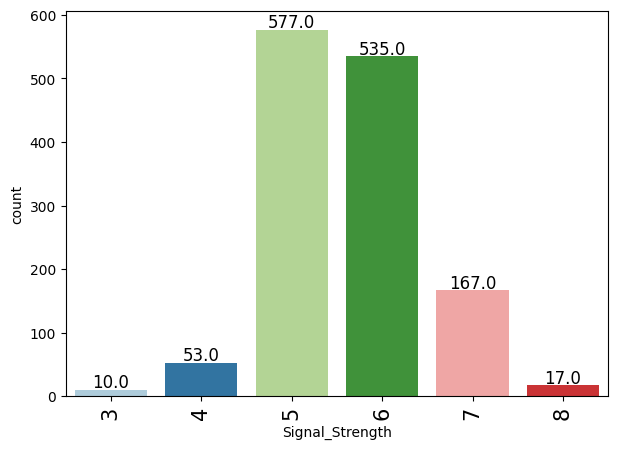

In [16]:
labeled_barplot(Data, "Signal_Strength")

Class 5 has the highest strength at 42% followed by class 6 @ 39%

**Part A - Q1 E - Share insights from the initial data analysis (at least 2).**

In [17]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


 All parameters are positively skewed. Standard deviation is maximum for Parameter7, it is 46.825975.

 Parameters 2, 3,5,8 and 10 looks close and kind of overlapping.

**Part A - Q2 A - Split the data into X & Y.**

In [18]:
## Separating Independent and Dependent Columns
X = Data.drop(['Signal_Strength'],axis=1)
Y = Data[['Signal_Strength']]

In [19]:
Y.head()

,Signal_Strength
0,5
1,5
2,5
3,6
5,5


In [20]:
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [21]:
Y.shape

(1359, 1)

In [22]:
X.shape

(1359, 11)

**Part A - Q2 B - Split the data into train & test with 70:30 proportion.**

In [23]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y)

**Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.**

In [24]:
###printing the shape of all 4 variables
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951, 1)
(408, 1)


**Part A - Q2 D - Normalise the train and test data with appropriate method.**

In [25]:
#Applying MinMax Scalar
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
X_Train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_Test = pd.DataFrame(StandardScaler().fit_transform(X_test))
print("X_train.shape",X_train.shape)
print("X_test.shape",X_test.shape)
print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

X_train.shape (951, 11)
X_test.shape (408, 11)
y_train.shape (951, 1)
y_test.shape (408, 1)


In [26]:
X_train

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
849,6.4,0.630,0.21,1.6,0.080,12.0,32.0,0.99689,3.58,0.66,9.8
777,6.9,0.635,0.17,2.4,0.241,6.0,18.0,0.99610,3.40,0.59,10.3
431,7.8,0.550,0.35,2.2,0.074,21.0,66.0,0.99740,3.25,0.56,9.2
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7
330,10.2,0.360,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5
...,...,...,...,...,...,...,...,...,...,...,...
1001,9.9,0.350,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6
608,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4
1569,6.2,0.510,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5
301,11.1,0.180,0.48,1.5,0.068,7.0,15.0,0.99730,3.22,0.64,10.1


In [27]:
y_train

,Signal_Strength
849,5
777,6
431,5
77,6
330,6
...,...
1001,7
608,6
1569,6
301,6


In [28]:
from keras.utils import to_categorical

**Part A - Q2 E - Transform Labels into format acceptable by Neural Network**

In [29]:
print('First example label: ', y_train)

First example label:        Signal_Strength
849                 5
777                 6
431                 5
77                  6
330                 6
...               ...
1001                7
608                 6
1569                6
301                 6
120                 5

[951 rows x 1 columns]


In [30]:
#One hot encoding
# convert integers to dummy variables (i.e. one hot encoded)
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

**Part A - Q3 A - Design a Neural Network to train a classifier.**

In [31]:
#Initialize Sequential model
model = Sequential()

model.add(Dense(11, activation='relu'))
#model.add(Dense(10, activation='relu'))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

**Part A - Q3 B - Train the classifier using previously designed Architecture**

In [32]:
history = model.fit(X_train, trainY,
          validation_data=(X_test, testY),
          epochs=100,
          batch_size=X_train.shape[0])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.1739 - accuracy: 0.0389 - val_loss: 2.6731 - val_accuracy: 0.4289
Epoch 2/100
1/1 [==============================] - 0s 64ms/step - loss: 3.1750 - accuracy: 0.4374 - val_loss: 4.1449 - val_accuracy: 0.3554
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 4.5206 - accuracy: 0.3565 - val_loss: 4.3410 - val_accuracy: 0.4167
Epoch 4/100
1/1 [==============================] - 0s 57ms/step - loss: 4.9243 - accuracy: 0.4290 - val_loss: 2.5838 - val_accuracy: 0.3701
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 2.9061 - accuracy: 0.3565 - val_loss: 2.0675 - val_accuracy: 0.4461
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 2.3486 - accuracy: 0.4374 - val_loss: 1.7539 - val_accuracy: 0.4069
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 1.9712 - accuracy: 0.4101 - val_loss: 1.6601 - val_accuracy: 0.4412
Epoch 8/100
1/1 [====

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 10)                120       
                                                                 
Total params: 252 (1008.00 Byte)
Trainable params: 252 (1008.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Part A - Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy**

13/13 [==============================] - 0s 3ms/step - loss: 1.1697 - accuracy: 0.4926


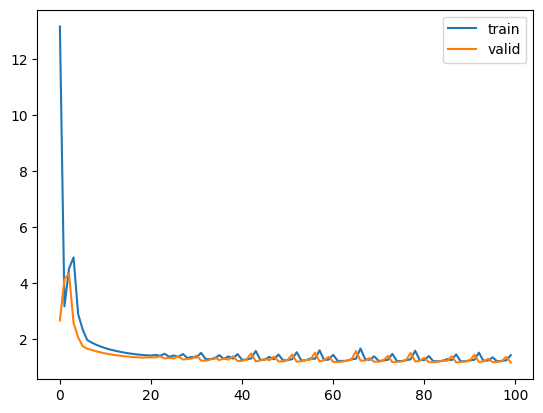

In [34]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, testY)

**Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.**

In [35]:
#Initialize Sequential model
model = Sequential()

model.add(Dense(11, activation='relu'))
#model.add(Dense(10, activation='relu'))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:

# Initializing the model
model1 = Sequential()
# Add one layer to begin with
model1.add(Dense(input_dim = 11, units=1,activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(input_dim = 11, units=24,activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(units=1,activation='relu', kernel_initializer='he_normal'))

# Configuration for compiler
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history1 = model1.fit(X_train, trainY,
          validation_data=(X_test, testY),
          epochs=200,
          batch_size=X_train.shape[0])

Epoch 1/200
1/1 [==============================] - 1s 780ms/step - loss: 9.4281 - accuracy: 0.0126 - val_loss: 2.2991 - val_accuracy: 0.4240
Epoch 2/200
1/1 [==============================] - 0s 41ms/step - loss: 2.2991 - accuracy: 0.4248 - val_loss: 2.2966 - val_accuracy: 0.4240
Epoch 3/200
1/1 [==============================] - 0s 40ms/step - loss: 2.2966 - accuracy: 0.4248 - val_loss: 2.2941 - val_accuracy: 0.4240
Epoch 4/200
1/1 [==============================] - 0s 58ms/step - loss: 2.2941 - accuracy: 0.4248 - val_loss: 2.2916 - val_accuracy: 0.4240
Epoch 5/200
1/1 [==============================] - 0s 40ms/step - loss: 2.2916 - accuracy: 0.4248 - val_loss: 2.2891 - val_accuracy: 0.4240
Epoch 6/200
1/1 [==============================] - 0s 59ms/step - loss: 2.2891 - accuracy: 0.4248 - val_loss: 2.2866 - val_accuracy: 0.4240
Epoch 7/200
1/1 [==============================] - 0s 41ms/step - loss: 2.2866 - accuracy: 0.4248 - val_loss: 2.2841 - val_accuracy: 0.4240
Epoch 8/200
1/1 [==

In [38]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
 dense_5 (Dense)             (None, 24)                48        
                                                                 
 dense_6 (Dense)             (None, 1)                 25        
                                                                 
 dense_7 (Dense)             (None, 10)                20        
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.**

13/13 [==============================] - 0s 3ms/step - loss: 10.5094 - accuracy: 0.1225


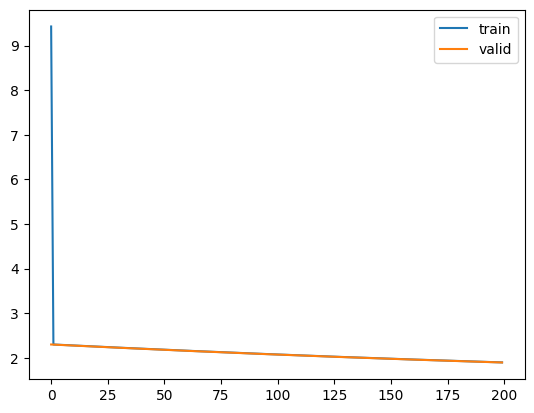

In [39]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, testY)

-- A very basic Neural Network with no hidden layer was able to model data very well(Result no 0 in Result Table above)

-- Further addition of layers and activations did not help increase performance

-- Model was able to acheive an MAE loss of close to 0(0.49 to be precise) on validation/test data

# Problem Two


**DOMAIN:** Autonomous Vehicles

**• CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.


**• DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervis



### PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

**Part B - Q1 A - Read the .h5 file and assign to a variable.**

In [36]:
import os
import datetime as dt
import six
import numpy as np
import h5py

In [37]:
Data= h5py.File('/content/drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5','r')
#data = (hdf5_path,'r')
#modeType   = 'w'
#hdfid = (MyData, modeType)

**Part B - Q1 B - Print all the keys from the .h5 file.**

In [38]:
###printing the shape of all 4 variables
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


**Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test**

In [39]:
# Load the training, validation and test sets
X_train = Data['X_train'][:]
y_train = Data['y_train'][:]
X_val = Data['X_val'][:]
y_val = Data['y_val'][:]
X_test = Data['X_test'][:]
y_test = Data['y_test'][:]

In [40]:
# Close this file

Data.close()

**Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**

In [41]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

print('\n')
print('Unique labels in y_train:', np.unique(y_train))
print('Unique labels in y_val:', np.unique(y_val))
print('Unique labels in y_test:', np.unique(y_test))

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


**Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.**

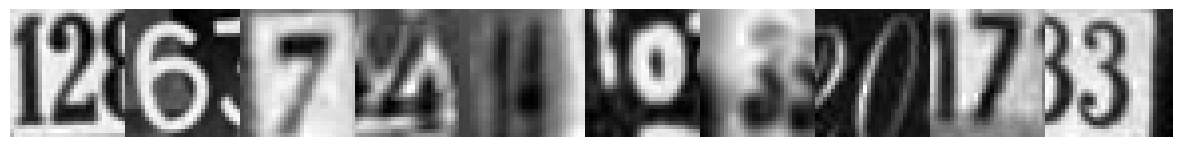

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [45]:
# Visualizing first 10 images in the dataset
plt.figure(figsize = (15, 4.5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32)),cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace = -0.1, hspace = -0.1)
plt.show()

print('Label for each of the above image: %s' % (y_train[0 : 10]))

**Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.**

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 32, 32) (18000, 32, 32) (42000,) (18000,)


In [48]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [49]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000,) (18000,)


**Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.**

In [51]:
from tensorflow.keras.utils import to_categorical
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Part B - Q2 E - Transform Labels into format acceptable by Neural Network**

**Part B - Q2 F - Print total Number of classes in the Dataset.**

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


**Part B - Q3 A - Design a Neural Network to train a classifier.**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [64]:
#creating a baisc model
model = Sequential()

In [65]:
#Creating model with relu
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [66]:
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [81]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [88]:
#making another model with ADM optimiser
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

**Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).**

In [68]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 4/100
210/210 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 5/100
210/210 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 6/100
210/210 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accura

In [83]:
#mlp_model
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 6s 4ms/step - loss: 2.7395 - accuracy: 0.0991
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3033 - accuracy: 0.1014
Epoch 3/100
1313/1313 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.1018
Epoch 4/100
1313/1313 [==============================] - 5s 3ms/step - loss: 2.3024 - accuracy: 0.1009
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3022 - accuracy: 0.1020
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3000 - accuracy: 0.1027
Epoch 7/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2842 - accuracy: 0.1139
Epoch 8/100
1313/1313 [==============================] - 6s 4ms/step - loss: 2.2506 - accuracy: 0.1255
Epoch 9/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2341 - accuracy: 0.1294
Epoch 10/100
1313/1313 [==============================] - 5s 3ms/step - l

In [96]:
#fitting the model with ADM optimiser
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=X_train.shape[0])

Epoch 1/100
1/1 [==============================] - 1s 853ms/step - loss: 0.8444 - accuracy: 0.7441 - val_loss: 0.7305 - val_accuracy: 0.7746
Epoch 2/100
1/1 [==============================] - 0s 228ms/step - loss: 0.8449 - accuracy: 0.7457 - val_loss: 0.7303 - val_accuracy: 0.7748
Epoch 3/100
1/1 [==============================] - 0s 335ms/step - loss: 0.8470 - accuracy: 0.7436 - val_loss: 0.7300 - val_accuracy: 0.7756
Epoch 4/100
1/1 [==============================] - 0s 267ms/step - loss: 0.8424 - accuracy: 0.7434 - val_loss: 0.7295 - val_accuracy: 0.7771
Epoch 5/100
1/1 [==============================] - 0s 263ms/step - loss: 0.8431 - accuracy: 0.7463 - val_loss: 0.7288 - val_accuracy: 0.7783
Epoch 6/100
1/1 [==============================] - 0s 463ms/step - loss: 0.8450 - accuracy: 0.7427 - val_loss: 0.7278 - val_accuracy: 0.7792
Epoch 7/100
1/1 [==============================] - 0s 342ms/step - loss: 0.8452 - accuracy: 0.7428 - val_loss: 0.7263 - val_accuracy: 0.7789
Epoch 8/100
1

**Part B - Q3 C - Evaluate performance of the model with appropriate metrics.**

In [84]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 2ms/step - loss: 1.4825 - accuracy: 0.5112


In [97]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.6387 - accuracy: 0.8090


In [85]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5111666917800903


In [98]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8090000152587891


**Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.**

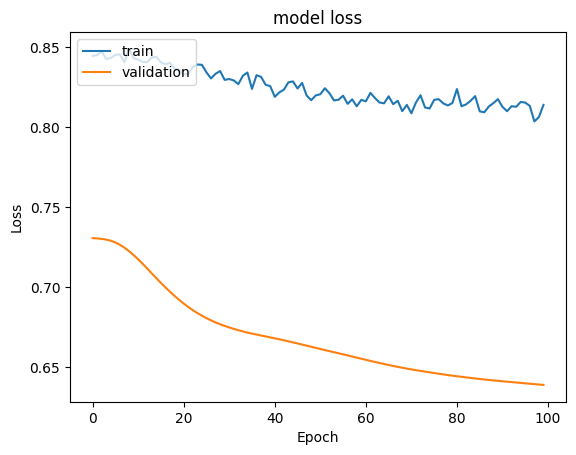

In [99]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

--tried with different modeling techniques, the best possible accuracy of 80% could come with ADAM optimiser.

-- Data quality could be the reason for low accuracy.

--more enhancement in data can improve the accuracy.
